In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.path.dirname('experiment/0505-01'), '..', '..','..')))
from helper_code import load_predictions_from_csv
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
folder = "results"
filename = "stacking.csv"

In [3]:
all_results = load_predictions_from_csv(folder, filename)
y_pred = list()
y_true = list()
for res in all_results:
    y_pred.append(res['outcome_binary'])
    y_true.append(res['actual_outcome'])

In [4]:
# In ra classification report
report = classification_report(y_true, y_pred, target_names=['Lớp 0 (Good)', 'Lớp 1 (Poor)'], digits=4)
print("\nBảng đánh giá mô hình rocket:\n")
print(report)


Bảng đánh giá mô hình rocket:

              precision    recall  f1-score   support

Lớp 0 (Good)     0.7297    0.6429    0.6835        42
Lớp 1 (Poor)     0.8235    0.8750    0.8485        80

    accuracy                         0.7951       122
   macro avg     0.7766    0.7589    0.7660       122
weighted avg     0.7912    0.7951    0.7917       122



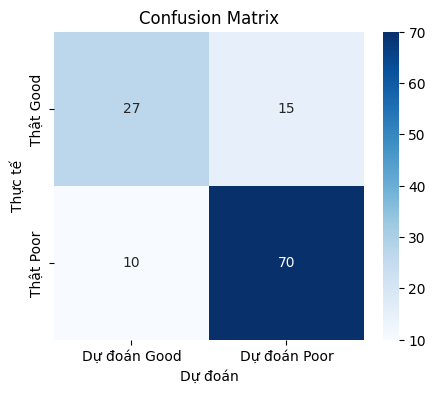

In [5]:
cm = confusion_matrix(y_true, y_pred)

# Vẽ biểu đồ confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Dự đoán Good', 'Dự đoán Poor'], yticklabels=['Thật Good', 'Thật Poor'])
plt.ylabel('Thực tế')
plt.xlabel('Dự đoán')
plt.title('Confusion Matrix')
plt.show()